In [2]:
import numpy as np
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
len(train_data[0])

218

In [8]:
train_labels[0]

1

In [8]:
len(train_data[1])

189

In [9]:
def vectorize_sequence(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

In [14]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
len(x_train[0])

10000

In [16]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(train_labels).astype('float32')

In [17]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(layers.Dense(16, activation= 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
x_value = x_train[:10000]
partial_x_train = x_train[10000:]

y_value = y_train[:10000]
partial_y_train = y_train[10000:]

In [20]:
network = model.fit(partial_x_train,partial_y_train, epochs=4, batch_size=512,validation_data=(x_value,y_value))

Epoch 1/4


30/30 [==============================] - 26s 533ms/step - loss: 0.5257 - accuracy: 0.7771 - val_loss: 0.4056 - val_accuracy: 0.8642
Epoch 2/4
30/30 [==============================] - 8s 274ms/step - loss: 0.3310 - accuracy: 0.8943 - val_loss: 0.3203 - val_accuracy: 0.8821
Epoch 3/4
30/30 [==============================] - 4s 147ms/step - loss: 0.2486 - accuracy: 0.9161 - val_loss: 0.2929 - val_accuracy: 0.8837
Epoch 4/4
30/30 [==============================] - 7s 251ms/step - loss: 0.2019 - accuracy: 0.9313 - val_loss: 0.2999 - val_accuracy: 0.8790


In [21]:
network.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
from matplotlib import pyplot as plt

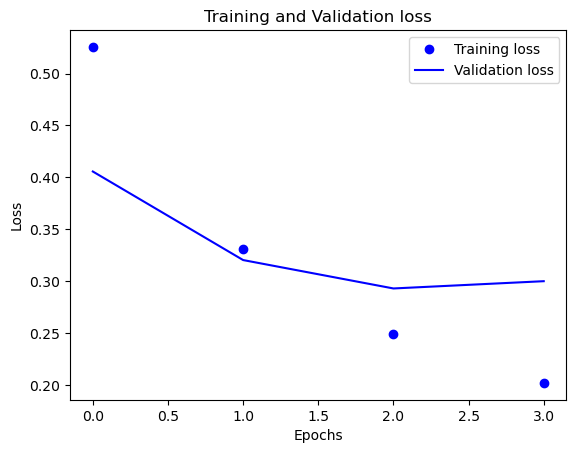

In [24]:
history_dict = network.history
loss_values = history_dict['loss']
vali_loss_value = history_dict['val_loss']
epochs = range(0,4)
plt.plot(epochs, loss_values,'bo',label='Training loss')
plt.plot(epochs,vali_loss_value,'b',label= 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

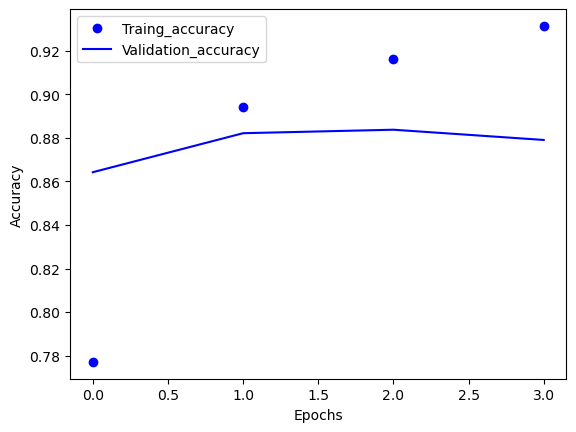

In [26]:
accuracy = history_dict['accuracy']
vali_acc = history_dict['val_accuracy']
epochs = range(0,4)
plt.plot(epochs,accuracy,'bo',label='Traing_accuracy')
plt.plot(epochs,vali_acc,'b',label='Validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
 result = model.evaluate(x_test,y_test)

782/782 [==============================] - 7s 3ms/step - loss: 1.5526 - accuracy: 0.5004


In [30]:
result

[1.5525808334350586, 0.5003600120544434]